## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
!ls

CONTRIBUTING.md         column_names.md         mod2_project_rubric.pdf
LICENSE.md              halfway-there.gif       student.ipynb
README.md               kc_house_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('kc_house_data.csv')

In [33]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [35]:
# model
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [36]:
df = df.drop(['date', 'sqft_basement'], axis='columns')

In [37]:
df.isna().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [38]:
from sklearn.impute import SimpleImputer
imp_nan = SimpleImputer(missing_values=np.nan, strategy='constant')

In [42]:
df.isna().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [53]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [55]:
df['waterfront'] = df['waterfront'].fillna(0)

In [59]:
df['waterfront'] = df['yr_renovated'].fillna(0)

In [62]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [64]:
df['view'] = df['view'].fillna(0)

In [73]:
drop = ['floors', 'sqft_lot', 'id']
df = df.drop(drop, axis='columns')

In [74]:
outcome = 'price'
predict = df.drop('price', axis='columns')
pred_sum = '+'.join(predict.columns)
f = outcome + '~' + pred_sum

In [75]:
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     2729.
Date:                Wed, 15 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:48:33   Log-Likelihood:            -2.4260e+05
No. Observations:               17755   AIC:                         4.852e+05
Df Residuals:                   17740   BIC:                         4.854e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.177e+06   3.29e+06      1.574      0.116   -1.27e+06    1.16e+07
bedrooms      -3.932e+04   2142.336    -18.353      0.000   -4.35e+04   -3.51e+04
bathrooms      4.506e+04   3588.059     12.558      0.000     3.8e+04    5.21e+04
sqft_living     151.6027      4.742     31.973      0.000     142.309     160.897
waterfront       14.2767      2.087      6.839      0.000      10.185      18.368
view           8.002e+04   2270.029     35.250      0.000    7.56e+04    8.45e+04
condition      2.686e+04   2673.764     10.047      0.000    2.16e+04    3.21e+04
grade          9.244e+04   2465.344     37.495      0.000    8.76e+04    9.73e+04
sqft_above       42.6562      4.430      9.628      0.000      33.972      51.340
yr_built      -2597.9020     80.857    -32.129      0.000   -2756.391   -2439.414
yr_renovated     14.2767      2.087      6.839      0.000      10.185      18.368
zipcode        -582.7517     37.380    -15.590      0.000    -656.020    -509.483
lat                6e+05   1.22e+04     49.280      0.000    5.76e+05    6.24e+05
long          -2.283e+05   1.49e+04    -15.334      0.000   -2.57e+05   -1.99e+05
sqft_living15    15.0575      3.921      3.840      0.000       7.372      22.743
sqft_lot15       -0.2345      0.060     -3.938      0.000      -0.351      -0.118
==============================================================================
Omnibus:                    16133.154   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1842353.308
Skew:                           3.948   Prob(JB):                         0.00
Kurtosis:                      52.275   Cond. No.                     3.88e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.16e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

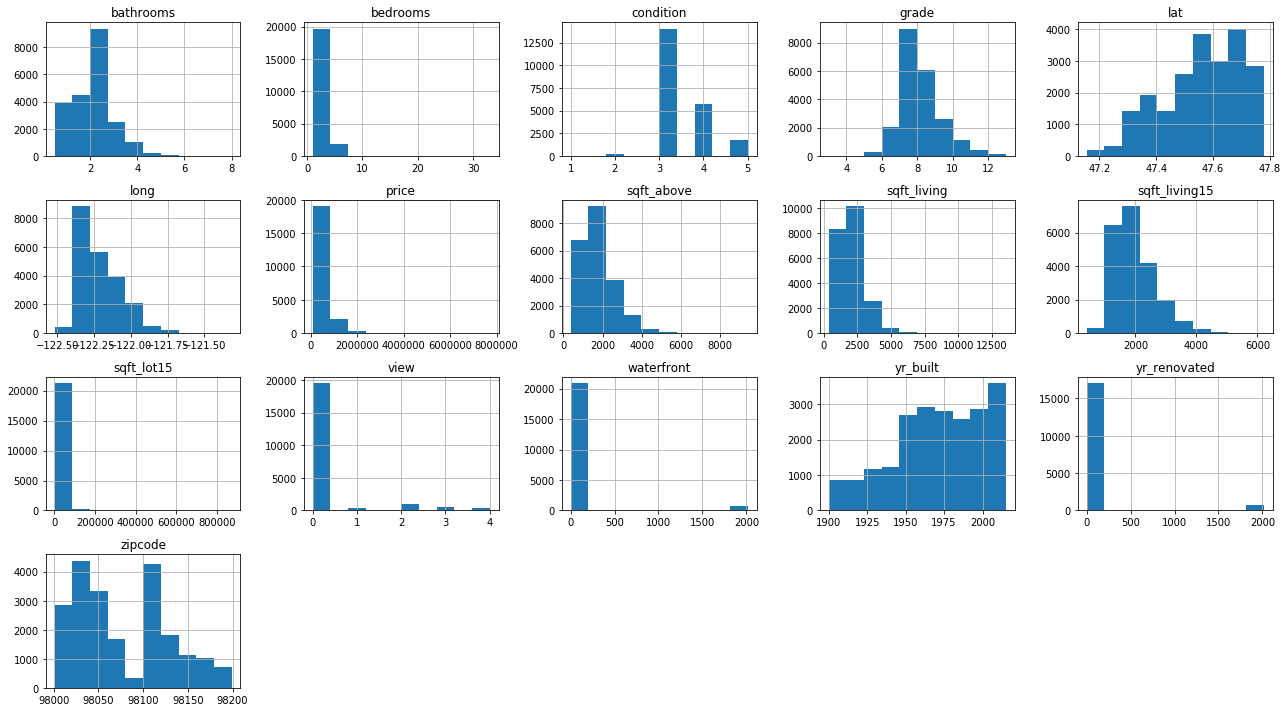

In [76]:
df.hist(figsize=(18, 10), layout=(4, 5));
plt.tight_layout()

In [78]:
df['zipcode'] = np.log(df['zipcode'])


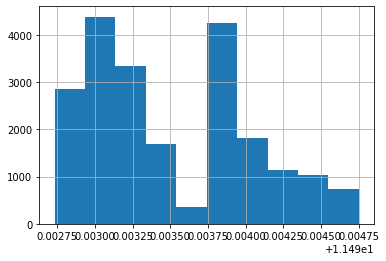

In [80]:
df['zipcode'].hist()

In [82]:
df['zipcode'].value_counts().count()

70

In [84]:
df['sqft_living15'] = np.log(df['sqft_living15'])

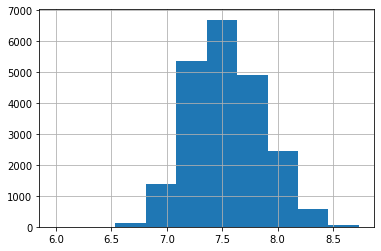

In [85]:
df['sqft_living15'].hist()

In [88]:
df['yr_built'] = np.log(df['yr_built'])

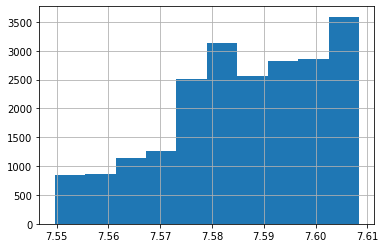

In [90]:
df['yr_built'].hist()

In [93]:
df['price'] = np.log(df['price'])

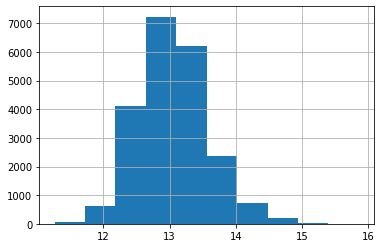

In [94]:
df['price'].hist()

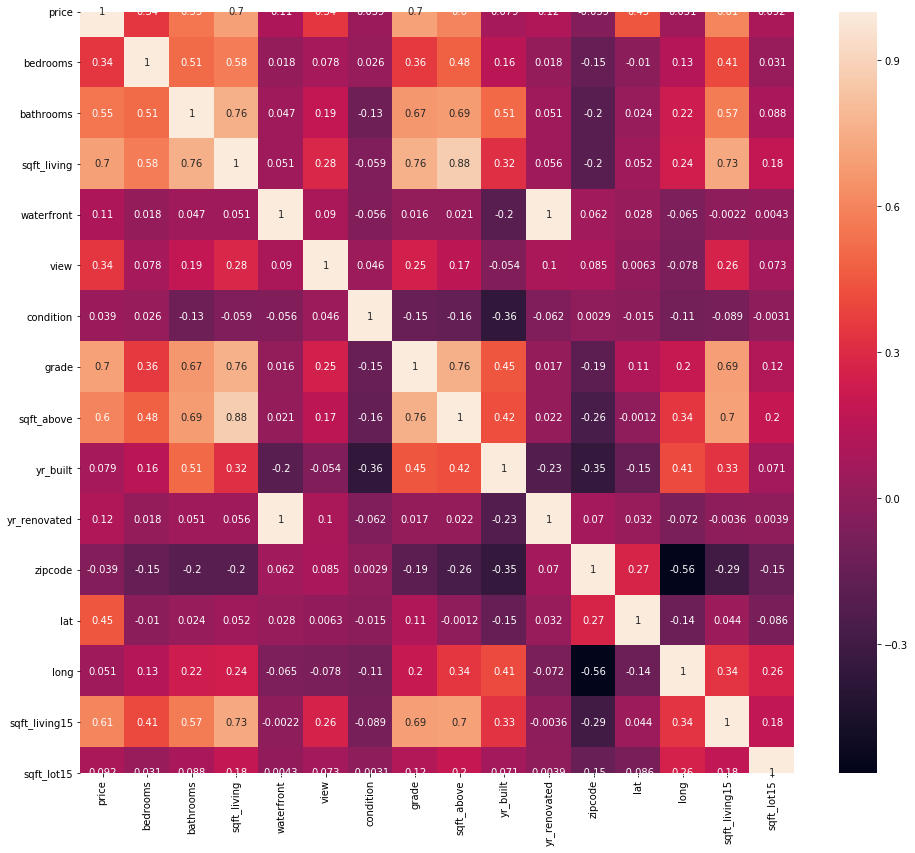

In [99]:
fig = plt.figure(figsize=(16, 14))
sns.heatmap(df.corr(), annot=True)

In [107]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.703720
sqft_living      0.695185
sqft_living15    0.607154
sqft_above       0.601579
bathrooms        0.551249
lat              0.448837
view             0.344653
bedrooms         0.343360
yr_renovated     0.118174
waterfront       0.106867
sqft_lot15       0.092281
yr_built         0.078987
long             0.050862
condition        0.038918
zipcode         -0.038757
Name: price, dtype: float64

In [110]:
drop = ['condition', 'zipcode', 'grade']
df = df.drop(drop, axis='columns')

In [112]:
outcome = 'price'
predict = df.drop('price', axis='columns')
pred_sum = '+'.join(predict.columns)
f = outcome + '~' + pred_sum

In [113]:
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     4178.
Date:                Wed, 15 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:06:27   Log-Likelihood:                -2431.0
No. Observations:               17755   AIC:                             4886.
Df Residuals:                   17743   BIC:                             4980.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -50.6529      3.009    -16.835      0.000     -56.551     -44.755
bedrooms         -0.0354      0.003    -12.547      0.000      -0.041      -0.030
bathrooms         0.1121      0.005     23.631      0.000       0.103       0.121
sqft_living       0.0002   6.15e-06     31.092      0.000       0.000       0.000
waterfront     1.993e-05   2.74e-06      7.279      0.000    1.46e-05    2.53e-05
view              0.0898      0.003     29.957      0.000       0.084       0.096
sqft_above     8.084e-05   5.71e-06     14.169      0.000    6.97e-05     9.2e-05
yr_built         -4.7252      0.191    -24.745      0.000      -5.100      -4.351
yr_renovated   1.993e-05   2.74e-06      7.279      0.000    1.46e-05    2.53e-05
lat               1.4740      0.016     94.907      0.000       1.444       1.504
long             -0.2136      0.018    -12.110      0.000      -0.248      -0.179
sqft_living15     0.3517      0.010     35.515      0.000       0.332       0.371
sqft_lot15     6.801e-08   7.94e-08      0.856      0.392   -8.76e-08    2.24e-07
==============================================================================
Omnibus:                      396.998   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              816.476
Skew:                          -0.118   Prob(JB):                    5.06e-178
Kurtosis:                       4.024   Cond. No.                     1.21e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [114]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state=0, 
                      learning_rate=0.005, n_estimators=1000,
                      max_depth=4,colsample_bytree=0.5, subsample=0.5)

In [116]:
model.fit(df.drop('price', axis='columns'), df['price'])

/Users/yrgg/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/yrgg/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[16:12:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.005, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)

In [117]:
model.base_score

0.5

In [126]:
from sklearn.model_selection import cross_val_score

In [124]:
X = df.drop('price', axis='columns')
y = df['price']
scores = cross_val_score(model, X, y, scoring='r2', cv=5) 

/Users/yrgg/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:34:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/yrgg/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:34:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/yrgg/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:35:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/yrgg/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:35:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/yrgg/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:35:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [125]:
scores

array([0.82727603, 0.82000003, 0.82163445, 0.83045461, 0.81033208])